In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

128 128


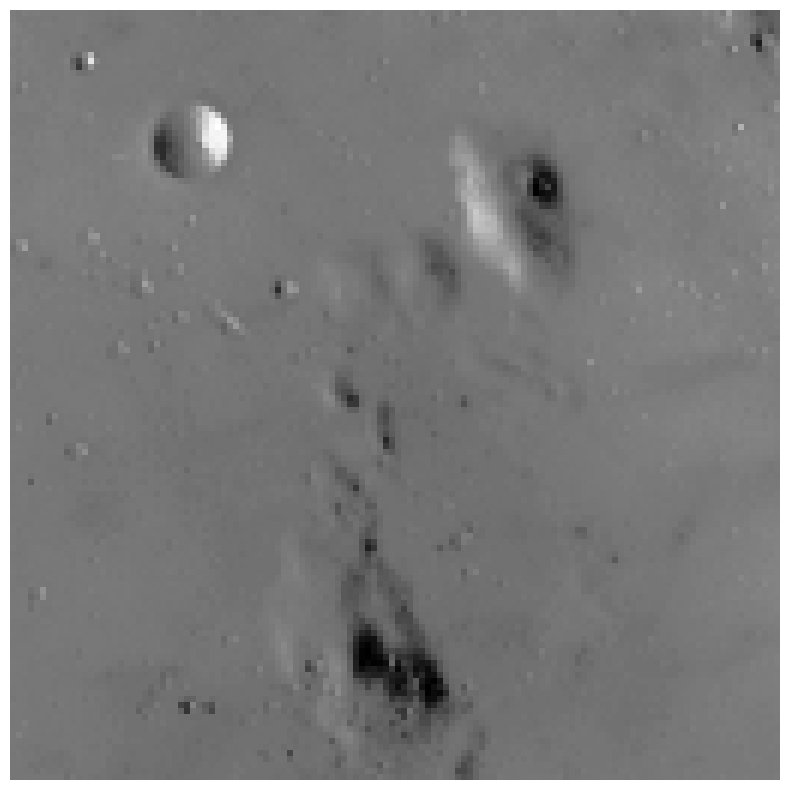

In [5]:
img_crowd = cv2.imread("moo2.png")
h, w = img_crowd.shape[:2]
print(h,w)
plt.figure(figsize = [10, 10])
plt.axis('off')
plt.imshow(cv2.cvtColor(img_crowd, cv2.COLOR_RGB2GRAY), cmap="gray")

# Histogram Equalization

In [59]:
def l_count_per_pixel(image, normFlag):
    possible_l = 256
    pix_counts = [0] * possible_l # store number of pixels for each possible l value

    w, h = image.shape[:2]

    l_val = 0

    for y in range(h):
        for x in range(w):
            # for each pixel, get l value
            l_val = image[x,y][0]

            pix_counts[l_val] = pix_counts[l_val] + 1

    # if flagged, normalize
    if(normFlag):
        for i in range(len(pix_counts)):
            pix_counts[i] = pix_counts[i]/(w*h)

    print(np.sum(pix_counts))
    return pix_counts

In [66]:
def image_histogram_equalization(image, number_bins=256):
    img_array = np.asarray(image)
    
    """
    Part (a): Normalized cumulative histogram
    """
    # Calculate histogram aka probability density function via binning, and normalize
    
    hist = l_count_per_pixel(image, 1)
    

    # Calculate cumulative histogram aka cumulative density function (CDF?)
    chistogram_array = np.empty([256,1])

    #integrate histogram
    sum = 0
    for i in range(number_bins):
        sum += hist[i]; 
        chistogram_array[i] = sum; 

    #plot_hist(chistogram_array)    


    """
    Part (c): compute the transform map T using cdf
    """
    transform_map = np.empty([256,1]).astype(np.uint8)
    


    """
    STEP 3: Apply the transformation T to reassign equalized pixel intensity 
    """    

    # transform pixel values to equalize -- insert code
    

    # reshape and write back into img_array
    eq_img_array = image


    return eq_img_array

In [61]:
def plot_hist(plot):
    # plot the normalized histogram
    plt.figure()
    plt.title("Grayscale Histogram (Normalized)")
    plt.xlabel("Bins")
    plt.ylabel("% of Pixels")
    plt.plot(plot)
    plt.xlim([0, 256])
    plt.show()

In [63]:
pix_counts = l_count_per_pixel(img_crowd, 0)
pix_counts_norm = l_count_per_pixel(img_crowd, 1)

#plot_hist(pix_counts)
#plot_hist(pix_counts_norm)

16384
1.0


1.0


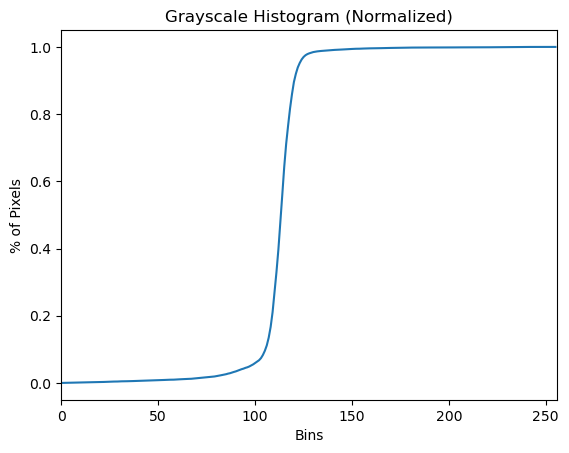

array([[[119, 119, 119],
        [117, 117, 117],
        [120, 120, 120],
        ...,
        [ 88,  88,  88],
        [ 93,  93,  93],
        [ 95,  95,  95]],

       [[120, 120, 120],
        [117, 117, 117],
        [117, 117, 117],
        ...,
        [ 92,  92,  92],
        [ 91,  91,  91],
        [ 95,  95,  95]],

       [[123, 123, 123],
        [119, 119, 119],
        [117, 117, 117],
        ...,
        [ 93,  93,  93],
        [ 86,  86,  86],
        [ 96,  96,  96]],

       ...,

       [[113, 113, 113],
        [114, 114, 114],
        [113, 113, 113],
        ...,
        [117, 117, 117],
        [115, 115, 115],
        [116, 116, 116]],

       [[113, 113, 113],
        [113, 113, 113],
        [112, 112, 112],
        ...,
        [116, 116, 116],
        [115, 115, 115],
        [117, 117, 117]],

       [[113, 113, 113],
        [113, 113, 113],
        [114, 114, 114],
        ...,
        [117, 117, 117],
        [116, 116, 116],
        [118, 118, 118]]

In [67]:
image_histogram_equalization(img_crowd)

1.0


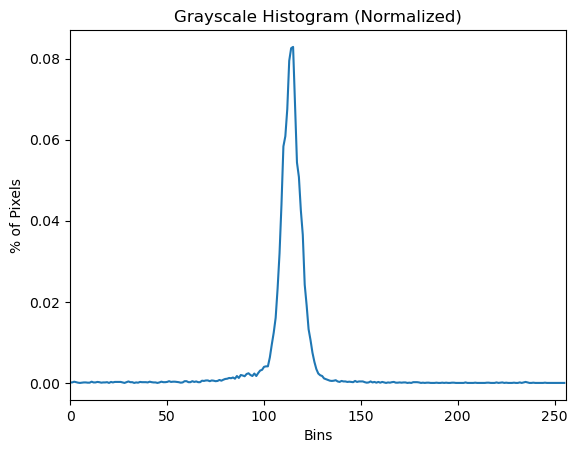

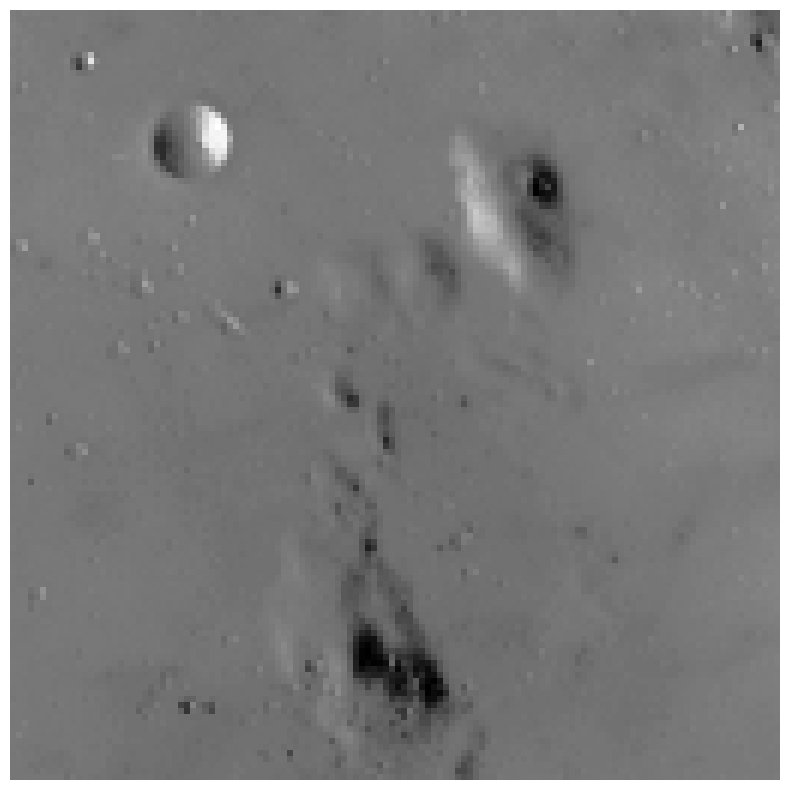

In [57]:
img_equalized = image_histogram_equalization(img_crowd)
plt.figure(figsize = [10, 10])
plt.axis('off')
plt.imshow(cv2.cvtColor(np.float32(img_equalized), cv2.COLOR_RGB2GRAY), cmap="gray")
